# Classification

## Linear and Nonlinear discriminant

Here we are going see for the first time how to use logistict regression

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
plt.style.use('default')

#for arrow, from http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import os
import warnings
warnings.filterwarnings("ignore")

In [17]:
dt_filename = os.path.join( "data/classification", "gene_data.csv")

# read data in pandas frame
df = pd.read_csv(dt_filename, sep = '\t')
df.head(10)

,M83670,M97496,tumour
0,-81,10,1
1,-30,60,1
2,-1,48,1
3,4,78,1
4,-34,19,1
5,-13,11,1
6,118,175,1
7,-35,42,1
8,31,105,1
9,-79,41,1


In order to create logistic regression model, we are going to build a function do_logistic. This function will plot the data and create the logistict model.

Within the function we:
- Initially, we normalize the data so that the different attributes values have the same domain
- Import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.
- fit your model on the dataset using fit()
- Based on the coefficients we draw the discriminant

[-10.02370860661167 -42.011680239742205 array([-16.85976946])]


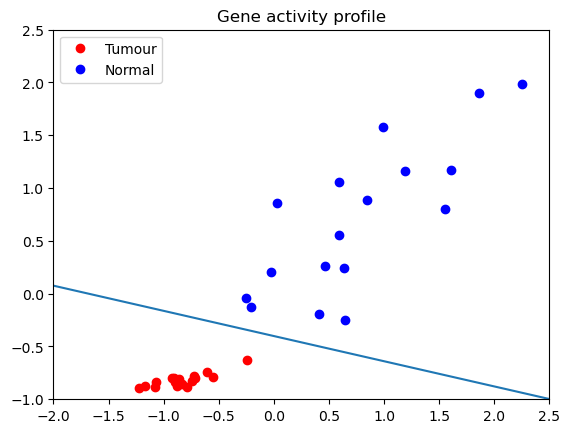

In [20]:
def do_logistic(input_data):
    y = input_data[['tumour']]
    x = input_data.drop(['tumour'], axis = 1)

    features = StandardScaler().fit_transform(x) # z = (x - u) / s u stands for the mean and s for the standard deviation
    df_norm = pd.DataFrame(features)
    df_norm['tumour'] = y

    plt.figure()
    plt.plot(df_norm[df_norm['tumour'] > 0][0], df_norm[df_norm['tumour'] > 0][1], 'or')
    plt.plot(df_norm[df_norm['tumour'] == 0][0], df_norm[df_norm['tumour'] == 0][1], 'ob')
    plt.title('Gene activity profile')
    plt.legend(['Tumour','Normal'])
    plt.axis([-2,2.5,-1,2.5])
    
    reg = LogisticRegression(C=1e12)
    reg.fit(features,y)    
    
    coefs = np.array( (reg.coef_[0,0],reg.coef_[0,1],reg.intercept_))
    print(coefs)
    minX,maxX = -2,2.5
    plots_x =[minX,maxX]
    
    plots_y =[(-coefs[2]-coefs[0]*minX)/coefs[1],
              (-coefs[2]-coefs[0]*maxX)/coefs[1]]
    
    plt.plot(plots_x,plots_y,'-')
    


do_logistic(df)

In [21]:
dt_filename = os.path.join( "data/classification", "gene_data_2.csv")

# read data in pandas frame
df = pd.read_csv(dt_filename, sep = '\t')
df.head()

,X53416,U37019,tumour
0,70,113,1
1,108,24,1
2,75,34,1
3,871,85,1
4,-92,-6,1


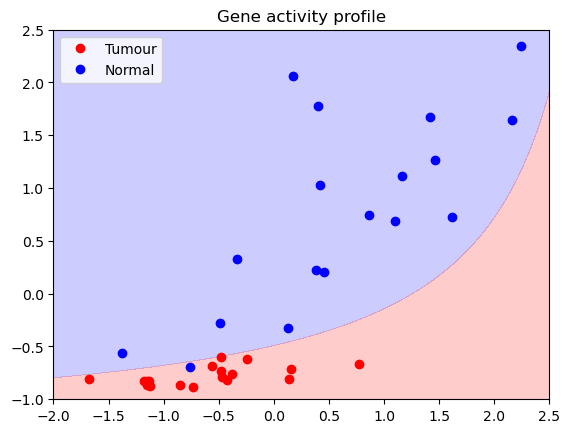

In [22]:
# Utility function just for the purpose of visualization

def poly_mat(reg,poly_func):
    """create score matrix for contour
    """
    Z = np.zeros((200,200))
    ys = np.linspace(-1,2.5,200)
    xs = np.linspace(-2,2.5,200)    
    X,Y = np.meshgrid(xs,ys)
    points = np.zeros((200,2))
    points[:,0] = xs
    for ix in range(len(ys)):
        points[:,1] = ys[ix]
        x_points=poly_func(points)
        Z[ix,:] = reg.decision_function(x_points)    
    return (X,Y,Z)


def poly_3features(X):
    """append a columns of 1
    """
    X_exp = np.zeros((X.shape[0],X.shape[1]+1))
    X_exp[:,:-1] = X 
    X_exp[:,-1] = X[:,0]*X[:,1]    
    return X_exp

def do_expand_regression(poly_func, input_data):
    y = input_data[['tumour']]
    x = input_data.drop(['tumour'], axis = 1)

    features = StandardScaler().fit_transform(x)
    df_norm = pd.DataFrame(features)
    df_norm['tumour'] = y

    plt.figure()
    plt.plot(df_norm[df_norm['tumour'] > 0][0], df_norm[df_norm['tumour'] > 0][1], 'or')
    plt.plot(df_norm[df_norm['tumour'] == 0][0], df_norm[df_norm['tumour'] == 0][1], 'ob')
    plt.title('Gene activity profile')
    plt.legend(['Tumour','Normal'])
    plt.axis([-2,2.5,-1,2.5])
    
    X_exp = poly_func(features)
    
    reg = LogisticRegression(C=1e12)
    reg.fit(X_exp,y)
    
    X,Y,Z = poly_mat(reg, poly_func)
    plt.contourf(X,Y,Z,[-1e16,0,1e16], colors = ('b', 'r'),alpha=0.2)

    
do_expand_regression(poly_3features, df)



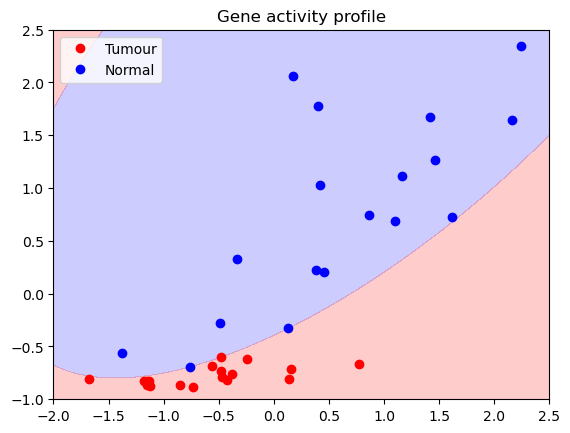

In [6]:
def poly_5features(X):
    """append a columns of 1
    """
    X_exp = np.zeros((X.shape[0],X.shape[1]+3))
    X_exp[:,:-3] = X 
    X_exp[:,-3] = X[:,0]*X[:,1]
    X_exp[:,-2] = X[:,0]**2
    X_exp[:,-1] = X[:,1]**2
    return X_exp


def poly_7features(X):
    """append a columns of 1
    """
    X_exp = np.zeros((X.shape[0],X.shape[1]+5))
    X_exp[:,:-5] = X 
    X_exp[:,-3] = X[:,0]*X[:,1]
    X_exp[:,-2] = X[:,0]**2
    X_exp[:,-1] = X[:,1]**2
    X_exp[:,-5] = X[:,0]**3
    X_exp[:,-4] = X[:,1]**3    
    return X_exp

def poly_9features(X):
    """append a columns of 1
    """
    X_exp = np.zeros((X.shape[0],X.shape[1]+7))
    X_exp[:,:-7] = X 
    X_exp[:,-3] = X[:,0]*X[:,1]
    X_exp[:,-2] = X[:,0]**2
    X_exp[:,-1] = X[:,1]**2
    X_exp[:,-5] = X[:,0]**3
    X_exp[:,-4] = X[:,1]**3
    X_exp[:,-6] = X[:,0]**2*X[:,1]
    X_exp[:,-7] = X[:,1]**2*X[:,0]    
    return X_exp

do_expand_regression(poly_5features, df)

## Diabetes Classification Problem

Here, you are going to predict diabetes using Logistic Regression Classifier.
Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. You can download data from the following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [28]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dt_filename = os.path.join( "data/classification", "diabetes.csv")
pima = pd.read_csv(dt_filename)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
X = pima.drop(['Outcome'], axis = 1) # Features
y = pima['Outcome'] # Target variable

To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [31]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

### Model Evaluation

A confusion matrix is a table that is used to evaluate the performance of a classification model. 

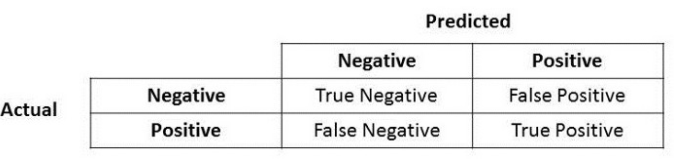

In [32]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

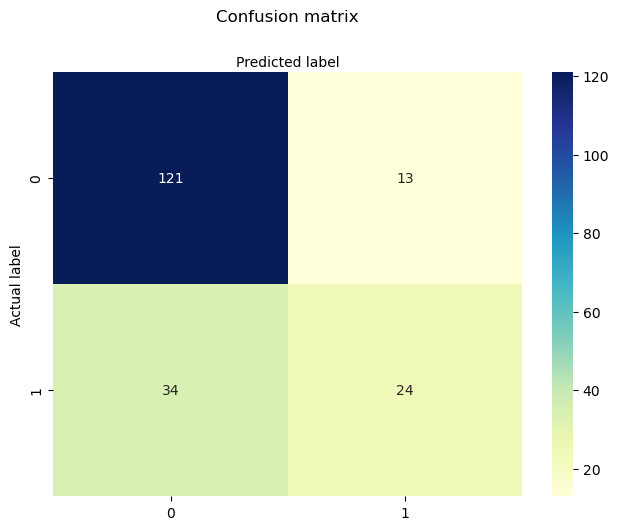

In [33]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# TN, FP 
# FN, TP

In [34]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Precision: 0.6486486486486487
Recall: 0.41379310344827586
Accuracy: 0.7552083333333334


### Precision 

Precision = TP / (TP + FP) - Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive. Precision is a good measure to determine, when the costs of False Positive is high.

For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

### Recall

Recall = TP / (TP + FN)

Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

### Accuracy

Accuracy is a metric describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

Accuracy = TP + TN / Total 



## Optimizing a hyperparameter

A hyperparameter is a parameter that is set outside the fitting process. For example, one of the hyperparameter of logistict regression is the C parameter. 

According to the documentation, C parameter corresponds to Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

So how can we try different hyper parameters to find the best model?

In [35]:
from sklearn.model_selection import GridSearchCV
seed = 0

#reg = LogisticRegression(C=1e12, tol=1e-10, solver='lbfgs')

lr = LogisticRegression(solver = 'lbfgs', max_iter = 500, random_state = seed )

parameters = {'C':[0.01, 0.1, 1 ,2, 10]}
clf = GridSearchCV(lr, parameters, cv = 10, scoring='accuracy').fit(X_train, y_train)

clf


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=500, random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 2, 10]}, scoring='accuracy')

## Exercise

Goal: Find the best model and report the evaluation metric chosen. The model aims to predict wheather the object is a rock or mine

More details about the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

Target: column 60

In [15]:
dt_filename = os.path.join( "data/classification", "sonar_data.csv")

df = pd.read_csv(dt_filename, header = None)

#TODO